# Pymaceuticals Inc.
---

### Analysis

- From the summary statistics, it is observed that Capomulin and Ramicane have the lowest "Mean Tumor Volume" and "Median Tumor Volume.The variance and standard deviation for the respective drugs are also low compared to other drugs.This may indicate their effectiveness in controlling tumor as compared to other drugs. Also the low standard error for Capomulin and Ramicane indicates consistency in the data. Certain drugs like Ketapril and Naftisol have very high values across all key metrics indicating the treatment to be less effective.  
- From the bar plot "Drug Regimen Vs Timepoint", it is observed that certain drugs like Capomulin have more timepoints. This may indicate that the treatments are monitored closely.It could also indicate that drugs with good results are being monitored more extensively.
- From the pie chart it is evident that the dataset includes an almost equal number of male/female mouses. This can help understand the effect of drug across both genders and reduce gender bias.  
- From the boxplot, Infubinol has an outlier value. This may indicate that there is variation in data and more research is required to further conclude.
- From the line plot for Capomulin drug study on single mouse, we can observe the presence of fluctuations in the tumor volume in response to the drug administered. When the graph goes up, it indicates increase in tumor volume. A downward graph shows reduction in tumor volume over time.
- From the scatter plot (for Capomulin drug), we can observe an upward trend indicating a strong correlation between mouse weight and tumor volume. The correlation coefficient is 0.84 which is close to 1 suggesting a strong positive correlation between weight and tumor volume. 
- Also the linear regression model can be used to make predictions. If we have new values for weight, we can predict the dependent variable using the linear regression model.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame


# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [1]:
#Solution
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how='left',sort=False)

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.


249

In [2]:
#Solution
merged_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


array(['g989'], dtype=object)

In [3]:
#Solution 1:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
grouped = merged_df.groupby(['Mouse ID', 'Timepoint'])
group_sizes = grouped.size()
duplicates = group_sizes[group_sizes > 1]
print(duplicates)

Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
dtype: int64


In [4]:
#Solution2:
merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
#Solution:
# Optional: Get all the data for the duplicate mouse ID.
merged_df[merged_df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
#Solution
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = merged_df[merged_df['Mouse ID'] != 'g989']
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.


248

In [8]:
#Solution
# Checking the number of mice in the clean DataFrame.
df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
#Solution
df.head()
series1 = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
series2 = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
series3 = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
series4 = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
series5 = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

series1.name='Mean Tumor Volume'
series2.name='Median Tumor Volume'
series3.name='Tumor Volume Variance'
series4.name='Tumor Volume Std. Dev.'
series5.name='Tumor Volume Std. Err.'

df1 = pd.concat([series1, series2, series3, series4, series5], axis=1)
df1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [10]:
#Solution:
df.head()
df.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

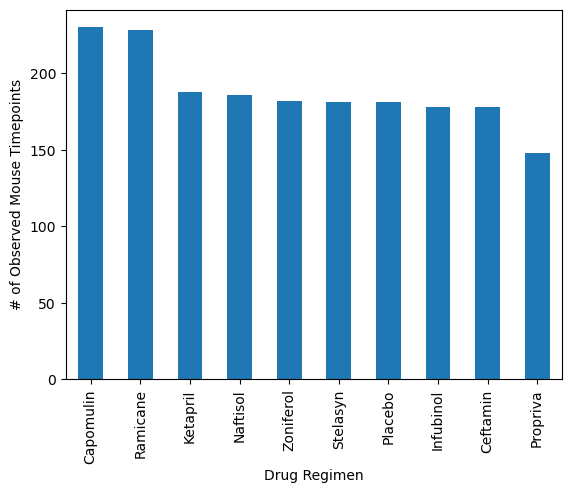

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


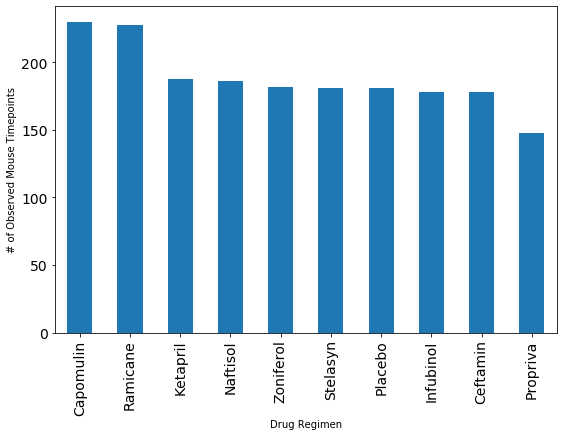

In [11]:
df['Drug Regimen'].value_counts().plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', figsize=(9,6), fontsize=14)

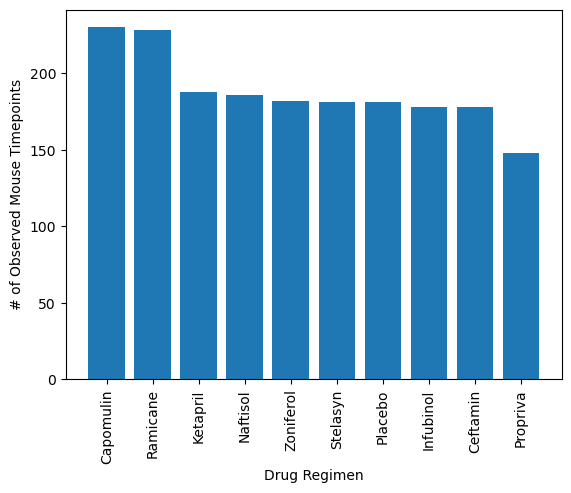

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


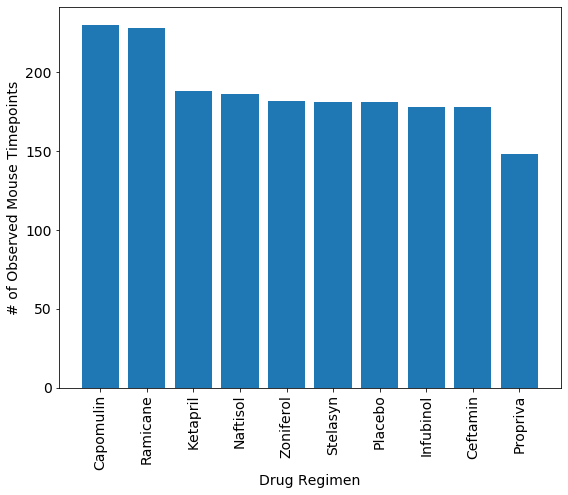

In [12]:
#plt.bar(df['Drug Regimen'], df['Drug Regimen'].value_counts())
pyplotSeries = df['Drug Regimen'].value_counts()
pyplotSeries.index
pyplotSeries.values
plt.figure(figsize=(9,7))
plt.bar(pyplotSeries.index, pyplotSeries.values)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('# of Observed Mouse Timepoints',fontsize=14)
plt.xticks(rotation =90,fontsize=14)
plt.yticks(fontsize=14)
plt.show()

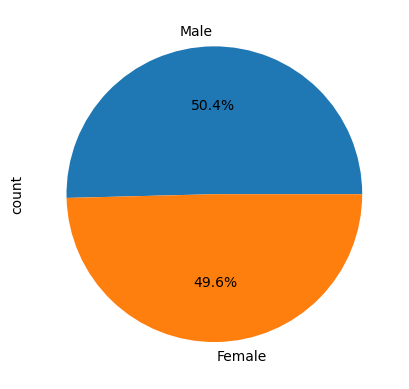

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


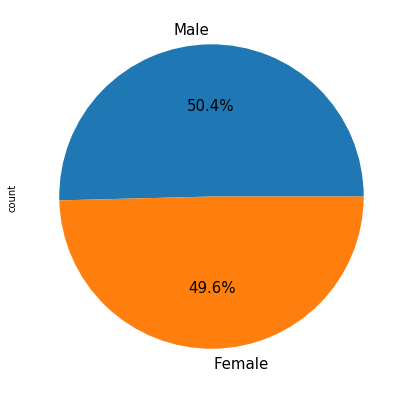

In [13]:
df.head()
df_noDuplicate = df[['Sex', 'Mouse ID']].drop_duplicates()
df_noDuplicate['Sex'].value_counts().plot(kind='pie', ylabel='count', autopct='%1.1f%%', figsize=(7,7), fontsize=15)


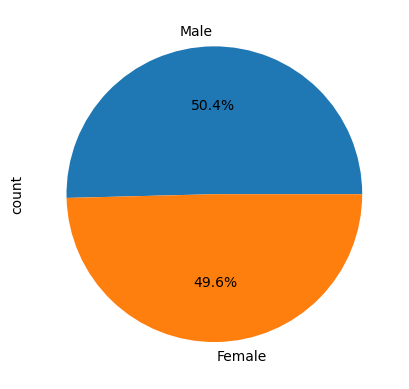

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


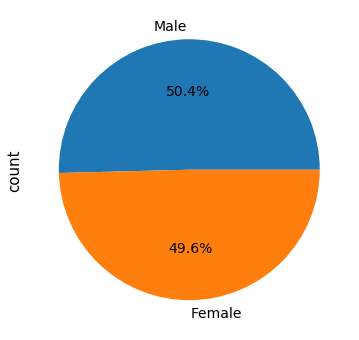

In [14]:
#Solution
df.head()
df_noDuplicate = df[['Sex', 'Mouse ID']].drop_duplicates()
pieSeries = df_noDuplicate['Sex'].value_counts()
labels = pieSeries.keys()
plt.figure(figsize=(6,6))
plt.pie(pieSeries, labels=labels, autopct='%1.1f%%',textprops={'fontsize': 14})
plt.ylabel('count', fontsize=15)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [70]:
# Get the last timepoint for each mouse
last_timepoint = df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge with original DataFrame to get the tumor volume at the last timepoint
final_data = pd.merge(last_timepoint, df, on=['Mouse ID', 'Timepoint'])

# Filter for ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = final_data[final_data['Drug Regimen'].isin(treatment_regimens)]

# Final result
final_tumor_volumes = final_tumor_volumes[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']]
print(final_tumor_volumes)


    Mouse ID Drug Regimen  Tumor Volume (mm3)  Timepoint
0       a203    Infubinol           67.973419         45
1       a251    Infubinol           65.525743         45
3       a275     Ceftamin           62.999356         45
6       a411     Ramicane           38.407618         45
7       a444     Ramicane           43.047543         45
..       ...          ...                 ...        ...
238     y769     Ceftamin           68.594745         45
239     y793    Capomulin           31.896238         45
240     y865     Ceftamin           64.729837         45
244     z578     Ramicane           30.638696         45
245     z581    Infubinol           62.754451         45

[100 rows x 4 columns]


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [88]:
#Solution
# Put treatments into a list for for loop (and later for plot labels)
#treatments = final_tumor_volumes['Drug Regimen'].unique()
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    # add subset
    subset = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    subset.name = treatment
    tumor_vol_data.append(subset)
    # Determine outliers using upper and lower bounds
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]    
    #print(f"{treatment} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}, Outliers: {outliers.tolist()}")
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Capomulin, dtype: float64)
Ramicane's potential outliers: Series([], Name: Ramicane, dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Infubinol, dtype: float64
Ceftamin's potential outliers: Series([], Name: Ceftamin, dtype: float64)


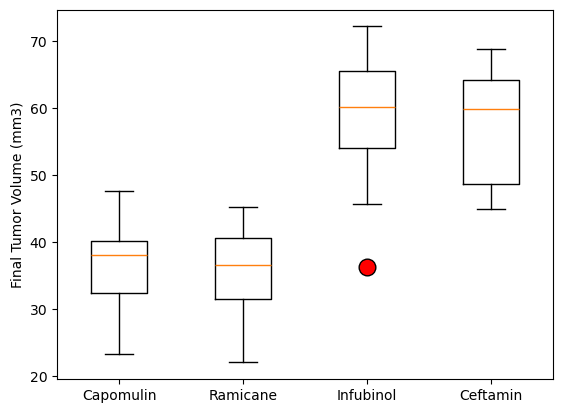

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


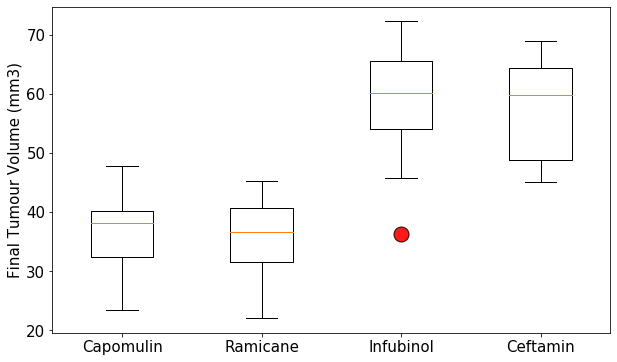

In [214]:
# Boxplot with custom colors
plt.figure(figsize=(10,6))
                         
box = plt.boxplot(tumor_vol_data, 
                    flierprops={'alpha':0.9, 
                                'markersize': 15,
                                'markeredgecolor': 'black',
                                'marker': 'o'
                                })

cols = ['green', 'orange', 'red', 'purple']

for f, fc in zip(box['fliers'], cols):
    f.set_markerfacecolor(fc)
plt.ylabel('Final Tumour Volume (mm3)', fontsize=15) 
plt.xticks(ticks=range(1, len(treatments) + 1), labels=treatments, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

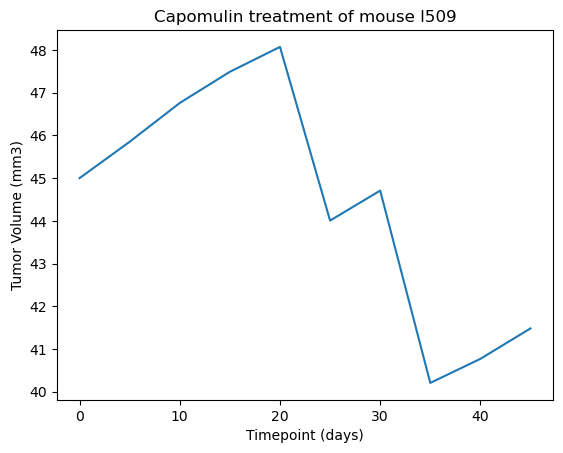

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


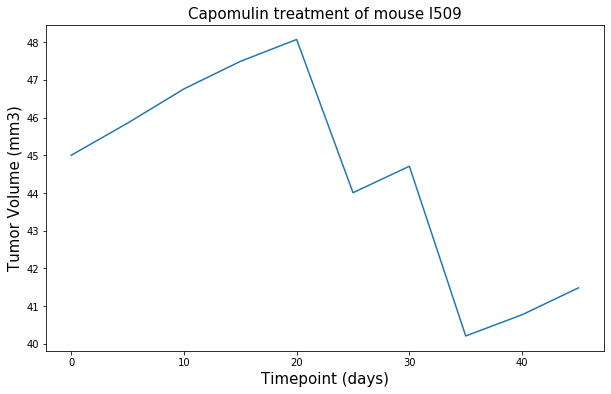

In [151]:
new_df = df[(df['Drug Regimen'] == 'Capomulin') & (df['Mouse ID'] == 'l509')][['Tumor Volume (mm3)', 'Timepoint']]
plt.figure(figsize=(10,6))
plt.plot(new_df['Timepoint'], new_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)', fontsize=15)
plt.ylabel('Tumor Volume (mm3)', fontsize=15)
plt.title('Capomulin treatment of mouse l509', fontsize=15)
plt.show()


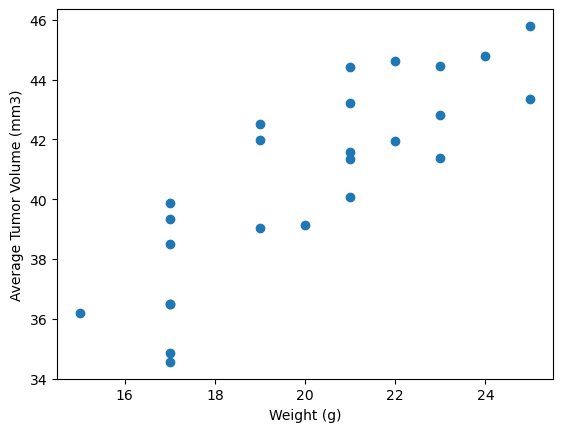

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


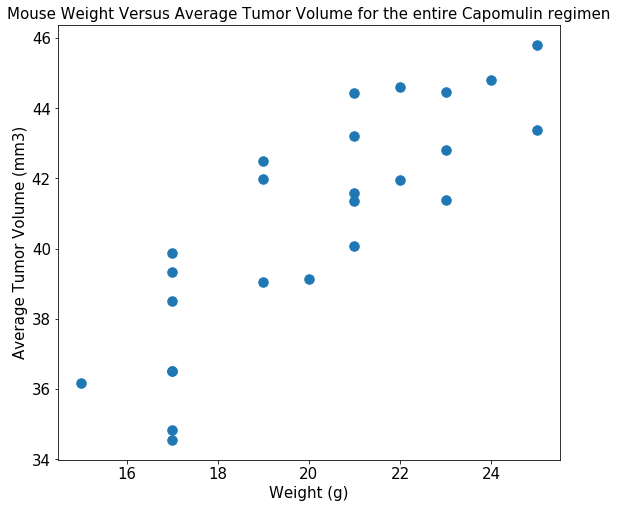

In [161]:
scatter_df = df[df['Drug Regimen'] == 'Capomulin']
scatter_mean = scatter_df.groupby('Mouse ID').mean()
plt.figure(figsize=(9,8))
plt.title('Mouse Weight Versus Average Tumor Volume for the entire Capomulin regimen', fontsize=15)
plt.scatter(scatter_mean['Weight (g)'], scatter_mean['Tumor Volume (mm3)'], s=90)
plt.xlabel('Weight (g)', fontsize=15)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


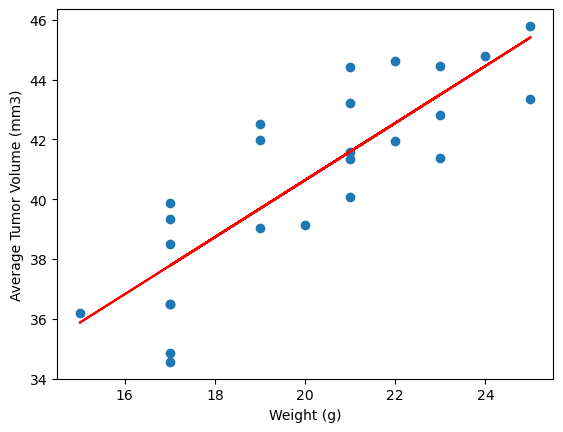

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation between mouse weight and the average tumor volume is 0.84


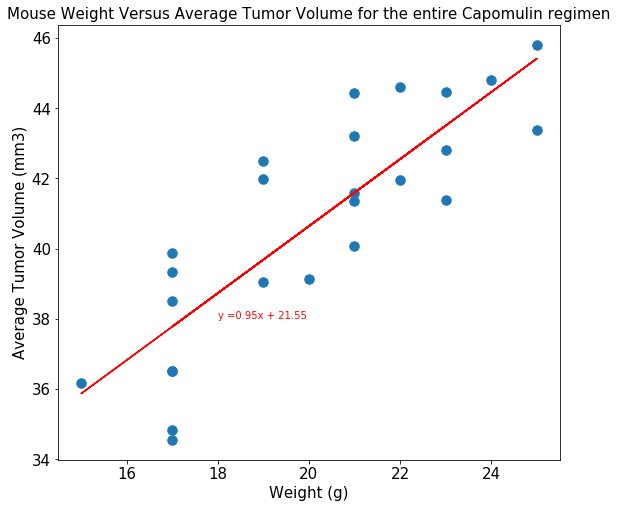

In [187]:
#Solution
# Correlation Coefficient
import scipy.stats as st
scatter_mean
correlation_coeff = st.pearsonr(scatter_mean['Weight (g)'], scatter_mean['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coeff,2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_mean['Weight (g)'], scatter_mean['Tumor Volume (mm3)'])
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_value = slope * scatter_mean['Weight (g)'] + intercept
plt.figure(figsize=(9,8))
plt.title('Mouse Weight Versus Average Tumor Volume for the entire Capomulin regimen', fontsize=15)
plt.scatter(scatter_mean['Weight (g)'], scatter_mean['Tumor Volume (mm3)'], s=90)
plt.plot(scatter_mean['Weight (g)'], regress_value, color='red')
plt.annotate(line_eq, (18,38), color='red')
plt.xlabel('Weight (g)', fontsize=15)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()